# Homework 5: Evaluation Techniques

Follow the instructions in the template, score will be given uppon it.

### Submission details: 
- [first name + last name], [id], [date]
- ...

### Import libraries
You are allowed to use these libraries only.

In [2]:
import pandas as pd
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
plt.style.use("ggplot")

Load external data

In [3]:
df = pd.read_csv('HW5 - train.csv')
X = df[df.columns[:-1]]
y = df['RANK']
print X.shape,y.shape

(2350, 9) (2350L,)


Write down a function that recives the following argumnets: <br><br>
$X$ - The input data in the usual format (2d numpy array)<br><br>
$y$ - The output data in the usual format (1d numpy array)<br><br>
$clf$ - A sklearn classifier with the methods predict_proba and fit<br><br>
$k$ - the number of folds as it appears in Kfold.<br><br>

In [12]:
def KfoldPlot(X, y, clf, k):
# create the k-folds
    # Create a K-Fold object
    k_fold = KFold(n_splits = k, shuffle = True, random_state=120)

    # Split the train set into K sets of train and test
    k_fold.split(X)

    # Save the indices of the train and test of for each fold
    k_fold_indices = []
    for train_index, test_index in k_fold.split(X):
        k_fold_indices.append((train_index, test_index))
    #print k_fold_indices
    
#run the K-folds test and train on clf and get predictions and probabilities for each fold
    # set lists to save the tests results
    auc_list = []
    fpr_list = [None] * len(k_fold_indices)
    tpr_list =[None] * len(k_fold_indices)
    threshold_list = [None] * len(k_fold_indices)
    predict_list = [None] * len(k_fold_indices)
    x_interp =  np.array(range(101)) / 100.0 # values for the x-axis for the y-axis the inrerpulation function return
    y_interp_list = [None] * len(k_fold_indices)
    #print x_interp
    
    for fold in range(len(k_fold_indices)):
        
        #train the model on the train data of the fold
        x_train = X.iloc[k_fold_indices[fold][0]]
        #print x_train.shape
        y_train = y.iloc[k_fold_indices[fold][0]]
        #print y_train.shape
        clf.fit(x_train, y_train)

        # get the Prediction on the test data of the fold
        x_test = X.iloc[k_fold_indices[fold][1]]
        y_test = y.iloc[k_fold_indices[fold][1]]
        probs = clf.predict_proba(x_test)[:,1]
        fpr_list[fold], tpr_list[fold], threshold_list[fold]  = roc_curve(y_test, probs, pos_label=1)
        auc_list.append(auc(fpr_list[fold], tpr_list[fold]))
        predict_list[fold] = clf.predict(x_test)
        
        #calculate the interp values and save to list
        y_interp_list[fold] = np.interp(x_interp, fpr_list[fold], tpr_list[fold])
    
    #calculate the mean roc curve with 
    y_interp_mean = np.mean(np.transpose(np.array(y_interp_list)), axis=1)
    plt.figure(figsize=(10,7))
        
# plot the curves
    colors = ['grey', 'grey', 'grey', 'grey', 'grey']
    lw = 2
    for i in range(len(fpr_list)):
        plt.plot(x_interp, y_interp_list[i], color=colors[i], lw=lw)
        #plt.plot(fpr_list[i], tpr_list[i], color=colors[i], lw=lw)
    plt.plot(x_interp, y_interp_mean, color = 'red', lw = lw, label='ROC Curve (AUC mean = {:.3f})'.format(np.mean(auc_list)))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0, 1])
    plt.ylim([0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

Run your a classifier for your choice and say couple of words about the results.

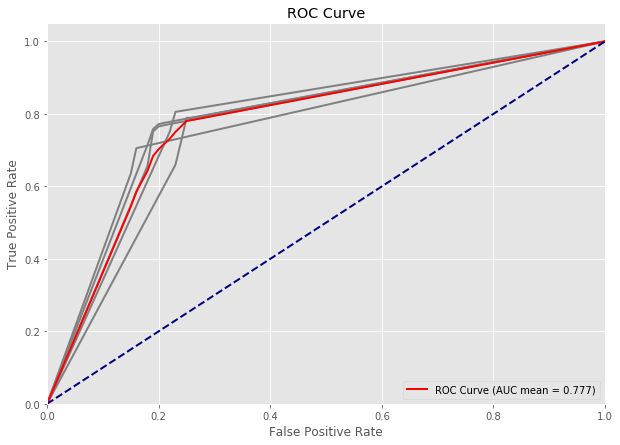

In [13]:
k = 5
clf =  DecisionTreeClassifier(criterion='gini', max_depth=15)
KfoldPlot(X, y, clf, k)

copcpcoccopsospsodpdks of words about the results